# Logistic Regression

## 1. Import Packages & Data Set

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

# Importing dataset and converting to pandas dataframe
data = pd.read_csv("Churn-Dataset.csv")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.9,1,0
1,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0,1
2,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1,1
3,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,1,1,79084.1,0,1


In [2]:
len(data)

10000

### 1.1 Inspecting Data Set

In [3]:
# Let's check the dimensions of the dataframe
print(data.shape)
print()
# let's look at the statistical aspects of the dataframe
print(data.describe())
print()
# Let's see the type of each column
print(data.info())

(10000, 14)

         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.892540   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.407418   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.550000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.200000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.100000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.244820   
std         0.581654      0.45584        0.499797     57

### 1.2 Data Preparation

#### 1.2.1 Change values to binary (if any)

In [4]:
# List of variables to map
data2 = data


varlist =  ['HasCrCard', 'IsActiveMember', 'Exited']

# Defining the map function
def binary_map(x):
    return x.map({1.0: 1, 0.0: 0})

# Applying the function to the housing list
data2[varlist] = data2[varlist].apply(binary_map)

# Printing the dataset after mapping
data2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.9,1,0
1,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0,1
2,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1,1
3,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,1,1,79084.1,0,1


#### 1.2.2 Create Dummy Variables (if needed)

In [5]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Gender','Geography']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

# Printing the dataset
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.9,1,0,0,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0,1,0,0,1
2,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1,1,0,0,0
3,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0,0,0,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,1,1,79084.1,0,1,0,0,1


In [6]:
ml = pd.get_dummies(data['Gender'], prefix='Gender')
ml1 = ml.drop(['Gender_Male'], 1)
data = pd.concat([data,ml1], axis=1)

geo = pd.get_dummies(data['Geography'], prefix='Geography')
geo1 = geo.drop(['Geography_Germany'], 1)
geo2 = geo1.drop(['Geography_Spain'], 1)
data = pd.concat([data,geo2], axis=1)

In [7]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,Gender_Male,Geography_Germany,Geography_Spain,Gender_Female,Geography_France
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.9,1,0,0,0,0,1,1
1,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112542.6,0,1,0,0,1,1,0
2,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.6,1,1,0,0,0,1,1
3,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0,0,0,0,0,1,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.8,1,1,1,79084.1,0,1,0,0,1,1,0


In [8]:
data = data.drop (['Surname','Geography','Gender','Churn'],1)

In [9]:
data["HasCrCard"]=pd.to_numeric(data["HasCrCard"],downcast='signed')
data["IsActiveMember"]=pd.to_numeric(data["IsActiveMember"],downcast='signed')
data["Exited"]=pd.to_numeric(data["Exited"],downcast='signed')

In [10]:
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,Gender_Female,Geography_France
0,15634602,619,42,2,0.0,1,1,1,101348.9,1,0,0,0,1,1
1,15647311,608,41,1,83807.9,1,0,1,112542.6,0,0,0,1,1,0
2,15619304,502,42,8,159660.8,3,1,0,113931.6,1,0,0,0,1,1
3,15701354,699,39,1,0.0,2,0,0,93826.6,0,0,0,0,1,1
4,15737888,850,43,2,125510.8,1,1,1,79084.1,0,0,0,1,1,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int8   
 7   IsActiveMember     10000 non-null  int8   
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int8   
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
 13  Gender_Female      10000 non-null  uint8  
 14  Geography_France   10000 non-null  uint8  
dtypes: float64(2), int64(5), int8(3), uint8(5)
memory usage: 625.1 KB


#### 1.2.3 Check outliers and missing values

In [12]:
# Checking for outliers in the continuous variables
num_data = data[['Tenure','Balance','EstimatedSalary','CreditScore']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Tenure,Balance,EstimatedSalary,CreditScore
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.012800,76485.892540,100090.244820,650.528800
std,2.892174,62397.407418,57510.493295,96.653299
min,0.000000,0.000000,11.600000,350.000000
25%,3.000000,0.000000,51002.125000,584.000000
50%,5.000000,97198.550000,100193.900000,652.000000
75%,7.000000,127644.200000,149388.225000,718.000000
90%,9.000000,149244.820000,179674.700000,778.000000
95%,9.000000,162711.715000,190155.345000,812.000000
99%,10.000000,185967.946000,198069.725000,850.000000


In [13]:
data.isnull().sum()

CustomerId           0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Geography_France     0
dtype: int64

## 2. Model Building

In [14]:
# Importing necessary libraries to split the data
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['CustomerId','Exited'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Gender_Female,Geography_France
0,619,42,2,0.0,1,1,1,101348.9,0,0,0,1,1
1,608,41,1,83807.9,1,0,1,112542.6,0,0,1,1,0
2,502,42,8,159660.8,3,1,0,113931.6,0,0,0,1,1
3,699,39,1,0.0,2,0,0,93826.6,0,0,0,1,1
4,850,43,2,125510.8,1,1,1,79084.1,0,0,1,1,0


### 2.1 Target Variable

In [15]:
# Putting response variable to y
y = data['Exited']

print(y.head())

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int8


### 2.2 Scale Continous Variable

In [16]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Tenure','Balance','EstimatedSalary','CreditScore']]=scaler.fit_transform(X_train[['Tenure','Balance','EstimatedSalary','CreditScore']])

X_train.head()

<ipython-input-16-cf2a038a8463>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Tenure','Balance','EstimatedSalary','CreditScore']]=scaler.fit_transform(X_train[['Tenure','Balance','EstimatedSalary','CreditScore']])
/Users/akmal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Gender_Female,Geography_France
1191,-0.114471,27,-0.695324,1.186657,1,0,1,-0.263491,1,1,0,0,0
4458,-0.176997,37,-1.041133,-1.228714,2,1,0,1.436762,1,0,0,0,1
1131,-1.562999,37,1.379532,0.786643,1,1,0,0.200584,1,0,1,0,0
9562,0.917214,39,-0.003705,-1.228714,2,1,1,0.247729,1,0,0,0,1
6579,-1.604683,36,0.687914,-1.228714,2,0,0,0.137519,0,0,0,1,1


In [17]:
### Checking the Churn Rate
churn = (sum(data['Exited'])/len(data['Exited'].index))*100
churn

20.369999999999997

## 3. Check Correlation Between Variables

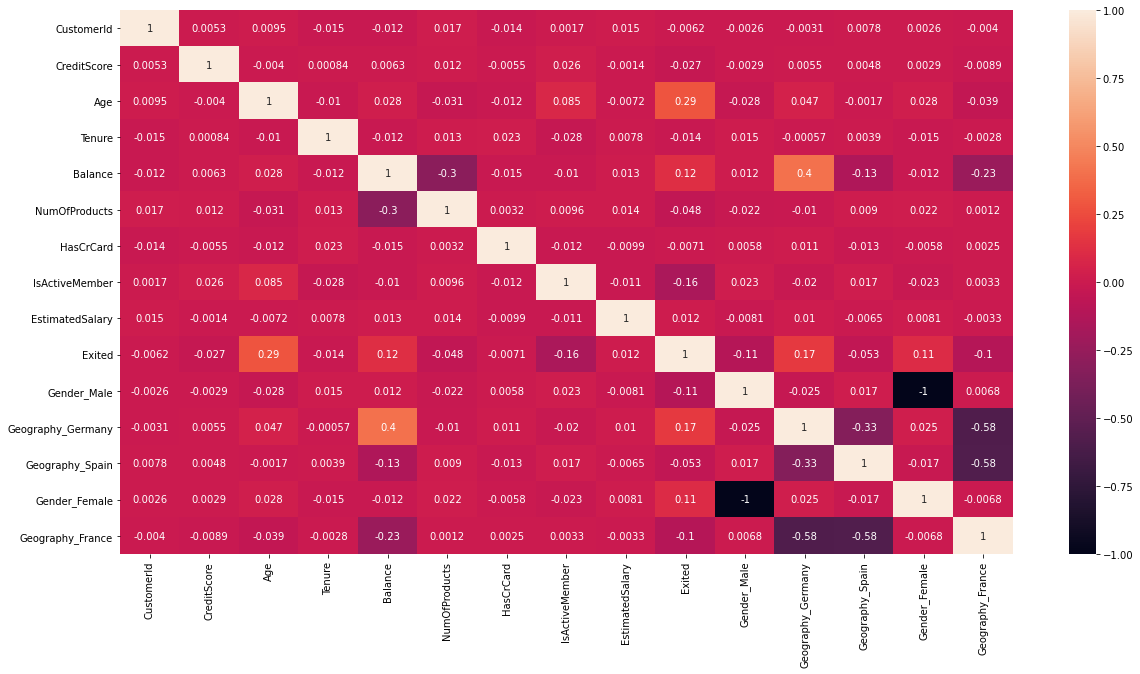

In [18]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [19]:
X_test = X_test.drop(['Gender_Female','Geography_Germany','Geography_Spain'], 1)
X_train = X_train.drop(['Gender_Female','Geography_Germany','Geography_Spain'],1)

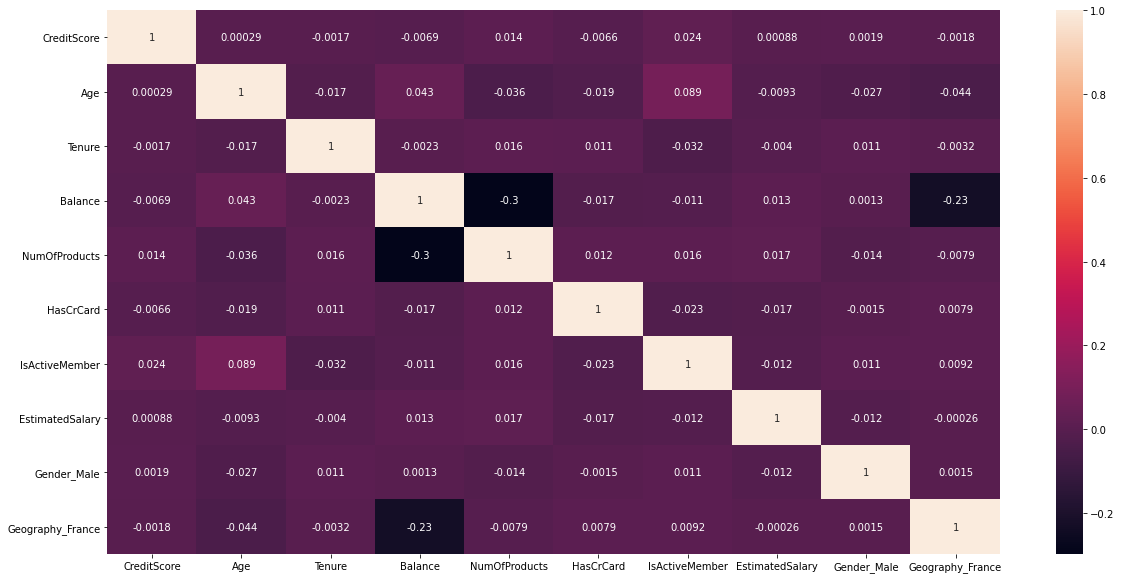

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [21]:
X_test = X_test.drop(['NumOfProducts','Geography_France'], 1)
X_train = X_train.drop(['NumOfProducts','Geography_France'],1)

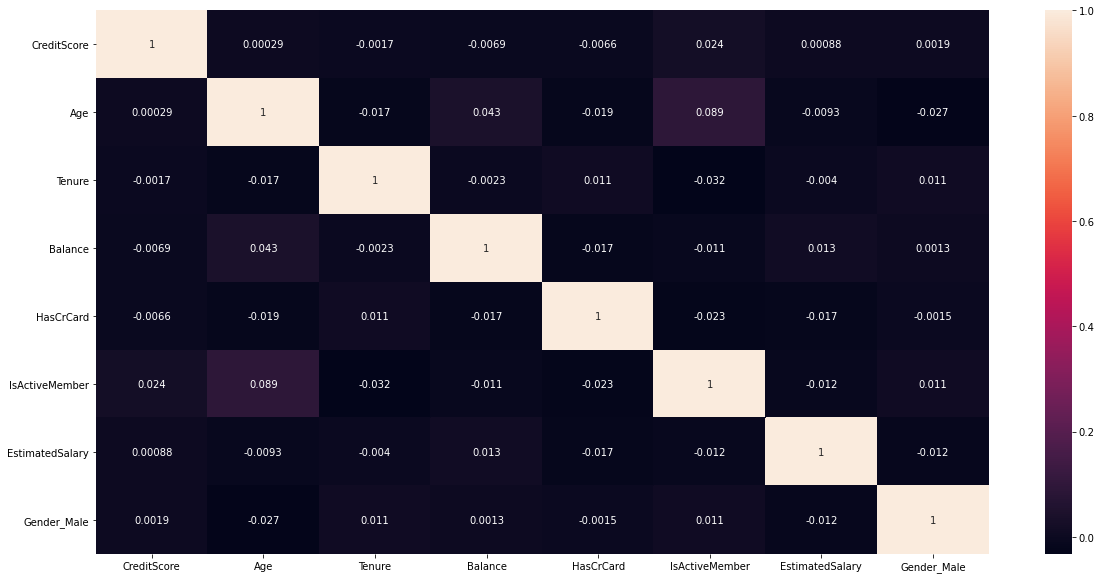

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## 4. Running Model

In [23]:
# Importing libraries to build the moddel
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6991
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3047.2
Date:                Thu, 20 May 2021   Deviance:                       6094.3
Time:                        19:44:43   Pearson chi2:                 7.00e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.6486      0.141    -25.820      0.000      -3.926      -3.372
CreditScore        -0.0833      0.032     -2.605      0.009      -0.146      -0.021
Age                 0.0728      0.003     23.956      0.000       0.067       0.079
Tenure             -0.0744      0.032     -2.313      0.021      -0.137      -0.011
Balance             0.2890      0.033      8.732      0.000       0.224       0.354
HasCrCard          -0.0355      0.070     -0.506      0.613      -0.173       0.102
IsActiveMember     -1.0326      0.068    -15.115      0.000      -1.167      -0.899
EstimatedSalary     0.0630      0.032      1.943      0.052      -0.001       0.126
Gender_Male        -0.4930      0.064     -7.648      0.000      -0.619      -0.367
===================================================================================
"""

### 3.1 Feature Selection with RFE

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 8)      
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

/Users/akmal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[('CreditScore', True, 1),
 ('Age', True, 1),
 ('Tenure', True, 1),
 ('Balance', True, 1),
 ('HasCrCard', True, 1),
 ('IsActiveMember', True, 1),
 ('EstimatedSalary', True, 1),
 ('Gender_Male', True, 1)]

In [25]:
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6991
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3047.2
Date:                Thu, 20 May 2021   Deviance:                       6094.3
Time:                        19:47:51   Pearson chi2:                 7.00e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.6486      0.141    -25.820      0.000      -3.926      -3.372
CreditScore        -0.0833      0.032     -2.605      0.009      -0.146      -0.021
Age                 0.0728      0.003     23.956      0.000       0.067       0.079
Tenure             -0.0744      0.032     -2.313      0.021      -0.137      -0.011
Balance             0.2890      0.033      8.732      0.000       0.224       0.354
HasCrCard          -0.0355      0.070     -0.506      0.613      -0.173       0.102
IsActiveMember     -1.0326      0.068    -15.115      0.000      -1.167      -0.899
EstimatedSalary     0.0630      0.032      1.943      0.052      -0.001       0.126
Gender_Male        -0.4930      0.064     -7.648      0.000      -0.619      -0.367
===================================================================================
"""

###  3.2 Predicting the Output

In [26]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1191    0.056255
4458    0.160501
1131    0.228923
9562    0.058160
6579    0.215811
4201    0.277141
138     0.634322
9407    0.100576
5327    0.103283
6815    0.092602
dtype: float64

In [27]:
y_train.head()

1191    0
4458    0
1131    0
9562    0
6579    0
Name: Exited, dtype: int8

In [28]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,Index
1191,0,0.056255,1191
4458,0,0.160501,4458
1131,0,0.228923,1131
9562,0,0.058160,9562
6579,0,0.215811,6579


In [29]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the dataframe
y_train_pred_final.head()

,Churn,Churn_Prob,Index,predicted
1191,0,0.056255,1191,0
4458,0,0.160501,4458,0
1131,0,0.228923,1131,0
9562,0,0.058160,9562,0
6579,0,0.215811,6579,0


### 3.3 Confusion Matrix

In [30]:
# Importing libraries
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[5419  168]
 [1186  227]]


In [31]:
# Checking the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8065714285714286


In [32]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,4.38
4,HasCrCard,2.91
7,Gender_Male,2.04
5,IsActiveMember,2.01
0,CreditScore,1.00
2,Tenure,1.00
3,Balance,1.00
6,EstimatedSalary,1.00


In [33]:
# Dropping the HasCrCard column (Variable with high VIF)
col = col.drop('Age', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3361.6
Date:                Thu, 20 May 2021   Deviance:                       6723.2
Time:                        19:48:22   Pearson chi2:                 6.96e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7775      0.068    -11.357      0.000      -0.912      -0.643
CreditScore        -0.0759      0.030     -2.503      0.012      -0.135      -0.016
Tenure             -0.0740      0.031     -2.424      0.015      -0.134      -0.014
Balance             0.2928      0.031      9.345      0.000       0.231       0.354
HasCrCard          -0.0530      0.066     -0.797      0.425      -0.183       0.077
IsActiveMember     -0.7434      0.062    -11.946      0.000      -0.865      -0.621
EstimatedSalary     0.0475      0.031      1.551      0.121      -0.013       0.107
Gender_Male        -0.4902      0.061     -8.026      0.000      -0.610      -0.371
===================================================================================
"""

In [34]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Index,predicted
1191,0,0.165759,1191,0
4458,0,0.179218,4458,0
1131,0,0.256477,1131,0
9562,0,0.077180,9562,0
6579,0,0.257344,6579,0


In [35]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7982857142857143


In [36]:
# Let's look at the final confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[5587,    0],
       [1412,    1]])

### 3.4 Calculating Recall, Precision, & F-Score

In [37]:
# Assigning the values from our matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [38]:
print("Recall:", TP / float(TP+FN))


print("Specificity:", TN / float(TN+FP))

Recall: 0.0007077140835102619
Specificity: 1.0


In [39]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1191,0,0.165759,1191,0,1,1,0,0,0,0,0,0,0,0
4458,0,0.179218,4458,0,1,1,0,0,0,0,0,0,0,0
1131,0,0.256477,1131,0,1,1,1,0,0,0,0,0,0,0
9562,0,0.077180,9562,0,1,0,0,0,0,0,0,0,0,0
6579,0,0.257344,6579,0,1,1,1,0,0,0,0,0,0,0


In [40]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.201857  1.000000  0.000000
0.1   0.1  0.290286  0.959660  0.120995
0.2   0.2  0.593571  0.644728  0.580634
0.3   0.3  0.753000  0.251238  0.879900
0.4   0.4  0.793143  0.036093  0.984607
0.5   0.5  0.798286  0.000708  1.000000
0.6   0.6  0.798143  0.000000  1.000000
0.7   0.7  0.798143  0.000000  1.000000
0.8   0.8  0.798143  0.000000  1.000000
0.9   0.9  0.798143  0.000000  1.000000


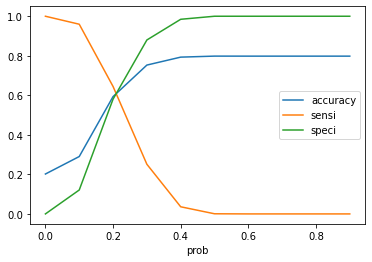

In [41]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [42]:
X_test[['Tenure','Balance','EstimatedSalary','CreditScore']] = scaler.transform(X_test[['Tenure','Balance','EstimatedSalary','CreditScore']])
X_test = X_test[col]
X_test.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
8018,-0.187418,-0.695324,0.733085,1,0,0.823100,1
9225,-0.583419,-0.349514,0.694587,1,1,1.098699,0
3854,0.385740,1.379532,0.949063,1,0,0.376655,1
2029,-1.354578,-0.349514,1.274782,1,1,1.153724,1
3539,0.177319,0.342104,-1.228714,1,0,-0.198999,1


In [43]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred we got above to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Similarly converting y_test which we have when we split the data to dataframe
y_test_df = pd.DataFrame(y_test)

# Making CustID an index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Final dataset
y_pred_final.head()

,Exited,CustID,0
0,1,8018,0.268694
1,0,9225,0.223014
2,0,3854,0.239339
3,0,2029,0.181322
4,0,3539,0.150771


In [44]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
#y_pred_final = y_pred_final.reindex(['Exited','CustID','Churn_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Exited,CustID,Churn_Prob
0,1,8018,0.268694
1,0,9225,0.223014
2,0,3854,0.239339
3,0,2029,0.181322
4,0,3539,0.150771


In [45]:
# Predicting the test data using 0.5 as cutoff
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Exited,CustID,Churn_Prob,final_predicted
0,1,8018,0.268694,1
1,0,9225,0.223014,1
2,0,3854,0.239339,1
3,0,2029,0.181322,0
4,0,3539,0.150771,0


In [46]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Exited, y_pred_final.final_predicted))

# Checking the Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Exited, y_pred_final.final_predicted )
print(confusion2)

# Assigning the values from the matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Recall/Sensitivity: ", TP / float(TP+FN))

# Let us calculate specificity
print("Specificity: ",TN / float(TN+FP))

# Let us calculate F-Score
print("F-Score: ",TP / float(TP+((FN+FP)/2)))

0.6196666666666667
[[1439  937]
 [ 204  420]]
Recall/Sensitivity:  0.6730769230769231
Specificity:  0.6056397306397306
F-Score:  0.42402826855123676


## 4. Calculating Gini Coefficient for Classification

Overall Gini Coefficient could be calculated as follow:

$
GINI = 2\times AUC - 1
$

Where $AUC$ is the area under ROC curve.

Source: https://luckytoilet.wordpress.com/2018/04/04/useful-properties-of-roc-curves-auc-scoring-and-gini-coefficients/

`The Gini Coefficient is 2*AUC – 1, and its purpose is to normalize the AUC so that a random classifier scores 0, and a perfect classifier scores 1. The range of possible Gini coefficient scores is [-1, 1]. If you search for “Gini Coefficient” on Google, you will find a closely related concept from economics that measures wealth inequality within a country.`

In [52]:
# Calculate AUC

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train_pred_final['Churn'],y_train_pred_final['Churn_Prob'])
gini = 2*auc - 1
gini

0.3024209091193528